<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_activation_function_comparisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch activation function comparisions- with In Build and customized functions

# Common Section- Import Libraries

In [26]:
# Deeplearning libraries
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset

#Number crunching
import numpy as np
import scipy.stats as stats

#Dataframe management
import pandas as pd

#Data Split-sklearn
from sklearn.model_selection import train_test_split

#Visulalization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns

# Common section -Data Loading and processing

In [27]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df=pd.read_csv(url,sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
#remove outliers
colzscore=df.columns.drop('quality')
df=df[~(df['total sulfur dioxide']>200)]

In [29]:
#Apply zscores in feture variables
df[colzscore]=df[colzscore].apply(stats.zscore)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1597.0,3.559388e-17,1.000313,-2.136087,-0.700608,-0.241254,0.505195,4.352281
volatile acidity,1597.0,1.245786e-16,1.000313,-2.280762,-0.771826,-0.045301,0.625338,5.878672
citric acid,1597.0,1.779694e-17,1.000313,-1.391823,-0.928677,-0.053845,0.769526,3.754246
residual sugar,1597.0,-9.788316e-17,1.000313,-1.169149,-0.452579,-0.237608,0.049020,9.292776
chlorides,1597.0,-1.423755e-16,1.000313,-1.604575,-0.372141,-0.180901,0.052836,11.123495
free sulfur dioxide,1597.0,8.898469e-18,1.000313,-1.422837,-0.847870,-0.177075,0.493721,5.380944
total sulfur dioxide,1597.0,-5.339081e-17,1.000313,-1.262581,-0.759698,-0.256814,0.497510,3.734821
density,1597.0,-8.361001e-14,1.000313,-3.546932,-0.611139,-0.000622,0.578043,3.683719
pH,1597.0,3.025479e-16,1.000313,-3.709380,-0.658744,-0.009673,0.574491,4.533826
sulphates,1597.0,8.898469e-17,1.000313,-1.937318,-0.639221,-0.226190,0.422859,7.916418


<AxesSubplot:xlabel='count', ylabel='quality'>

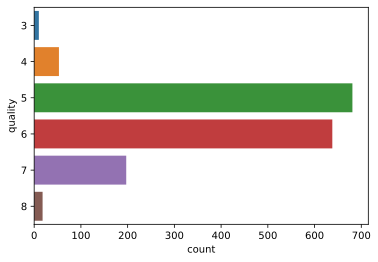

In [30]:
sns.countplot(y=df.quality)

In [31]:
df['boolquality']=0
df['boolquality'][df.quality>5]=1
#Check the distribution after conversion
df.boolquality.value_counts(normalize=True)*100

<ipython-input-31-08738ed505a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['boolquality'][df.quality>5]=1


1    53.412649
0    46.587351
Name: boolquality, dtype: float64

In [32]:
#Convert Data [features] & Labels[targets] into tensor
data=torch.tensor(df[colzscore].values).float()
labels=torch.tensor(df['boolquality'].values).float()
#labels.shape
labels=labels[:,None]
#labels

#Split the data
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.2)

#Convert into tensor datasets by gathering data and labels in train and test datasets
train_data=TensorDataset(train_data,train_label)
test_data=TensorDataset(test_data,test_label)

#batch size
batchsize=32
#Create the train and test Loaders
train_loader=DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])


# Experiemnt Through Inbuilt functions

### Create Model- through inbuilt Functions

In [33]:
def CreateModel(actfun):

  #Model Architecture
  ANNclass=nn.Sequential(
      nn.Linear(11,16),
      actfun,
      nn.Linear(16,32),
      actfun,
      nn.Linear(32,20),
      actfun,
      nn.Linear(20,1)
  )

  #lossfunction
  lossfunc=nn.BCEWithLogitsLoss()
  #optimizer
  optimizer=torch.optim.SGD(ANNclass.parameters(),lr=.01)

  #return
  return ANNclass,lossfunc,optimizer

# Train the Model using inbuilt functions

In [34]:
#no of epochs
numepochs=1000
def TrainModel():

  #Initializes loss & Accuracy
  losses=torch.zeros(numepochs)
  trainacc=[]
  testacc=[]


  #Starts each epoch
  for epochi in range(numepochs):

    #Start training
    ANNclass.train()

    #intializes batchloss and batch accuracy
    batchloss=[]
    batchacc=[]

    #Take features and targets from train_loader batch
    for X,y in train_loader:

      #forward pass
      yHat=ANNclass(X)
      #calculate Loss
      loss=lossfunc(yHat,y)

      #Backward propagation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #Batch loss and batch accuracy storing 
      batchloss.append(loss.item())
      batchacc.append(100*torch.mean(((yHat>0)==y).float()))

      #End of Loop

    #Now we are in first loop
    losses[epochi]=np.mean(batchloss)
    trainacc.append(np.mean(batchacc))

    ####test accuracy
    #Start testing and stop training
    ANNclass.eval()
    #devide the test loader in X & y--remember here the entire data is in one batch
    X,y=next(iter(test_loader))
    with torch.no_grad():
      yHat=ANNclass(X)

    testacc.append(100*torch.mean(((yHat>0)==y).float()))

    #End of epoch loop

  return trainacc,testacc,losses
  


# Run Model_ with Inbulit Function

In [35]:
#Activations function to measurfe their accuracy
actfuncs=[nn.ReLU(),nn.Tanh(),nn.Sigmoid()]

trainByActfun=np.zeros((numepochs,len(actfuncs)))
testByActfun=np.zeros((numepochs,len(actfuncs)))

for ai,actfun in enumerate(actfuncs):
  print(ai)
  print(actfun)
  ANNclass,lossfunc,optimizer=CreateModel(actfun)
  trainacc,testacc,losses=TrainModel()

  trainByActfun[:,ai]=trainacc
  testByActfun[:,ai]=testacc
  

0
ReLU()
1
Tanh()
2
Sigmoid()


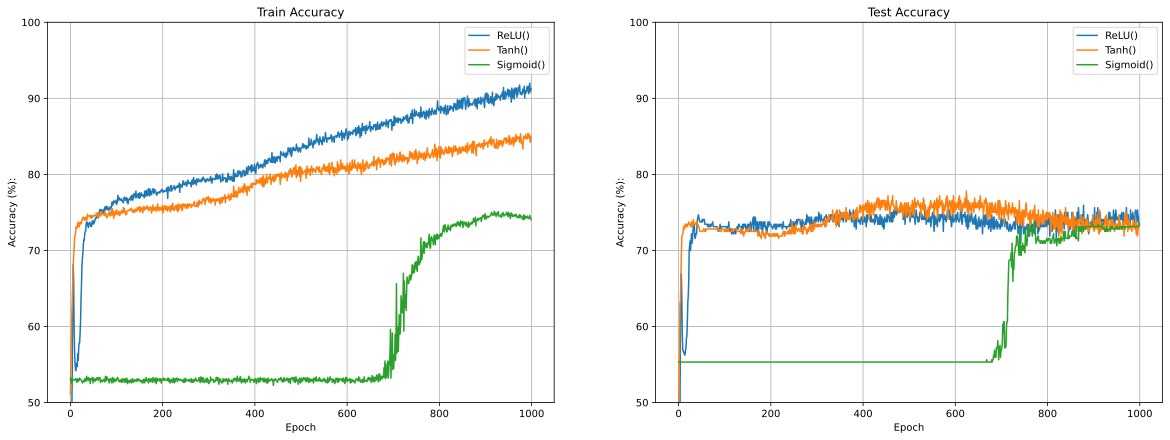

In [36]:
fig,ax=plt.subplots(1,2,figsize=(20,7))

ax[0].plot(trainByActfun)
ax[0].set_title('Train Accuracy')

ax[1].plot(testByActfun)
ax[1].set_title('Test Accuracy')

for i in range(2):
  ax[i].legend(actfuncs)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%):')
  ax[i].set_ylim([50,100])
  ax[i].grid()


plt.show()




# Create Model- Through Custom Functions

In [53]:
class ANNCClass(nn.Module):
  #initialzation
  def __init__(self,actfun):
    super().__init__()

    #input Layer
    self.input=nn.Linear(11,16)

    #Hidden Layers-fully connected
    self.fc1=nn.Linear(16,32)
    self.fc2=nn.Linear(32,32)

    #Output Layer
    self.output=nn.Linear(32,1)

    #Activation function to pass through
    self.actfun=actfun

  def forward(self,x):
    #get activation function type
    #This code replaces torch.relu with torch.<self.actfun>
    actfun=getattr(torch,self.actfun)
    x=actfun(self.input(x))
    x=actfun(self.fc1(x))
    x=actfun(self.fc2(x))
    return self.output(x)





# Run Customized Model

In [54]:
from torch.nn.modules import BCEWithLogitsLoss
#Activations function to measurfe their accuracy
actfuncs=['relu','tanh','sigmoid']

trainByActfun=np.zeros((numepochs,len(actfuncs)))
testByActfun=np.zeros((numepochs,len(actfuncs)))

for ai,actfun in enumerate(actfuncs):
  print(ai)
  print(actfun)
  ANNclass=ANNCClass(actfun)
  lossfunc=nn.BCEWithLogitsLoss()
  optimizer=torch.optim.SGD(ANNclass.parameters(),lr=.01)

  trainacc,testacc,losses=TrainModel()

  trainByActfun[:,ai]=trainacc
  testByActfun[:,ai]=testacc
  

0
relu
1
tanh
2
sigmoid


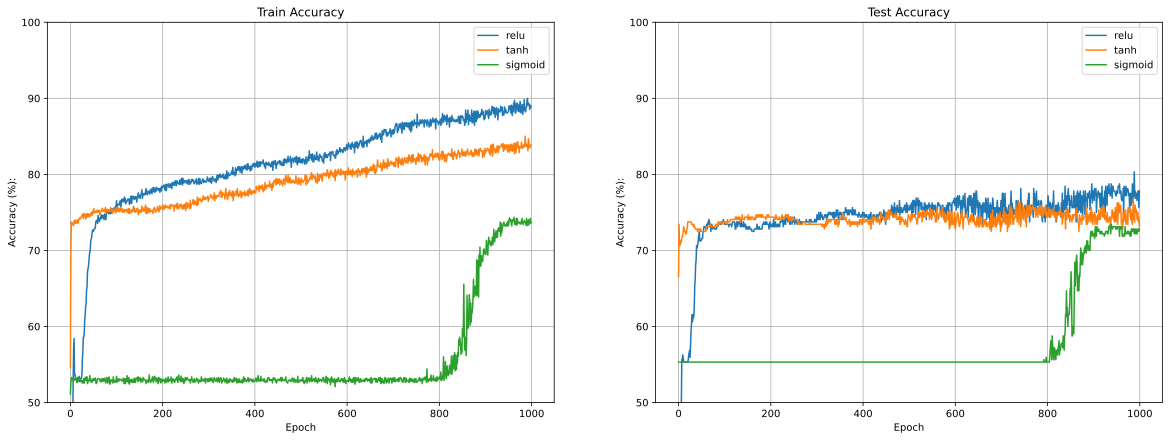

In [55]:
#Same plot function
fig,ax=plt.subplots(1,2,figsize=(20,7))

ax[0].plot(trainByActfun)
ax[0].set_title('Train Accuracy')

ax[1].plot(testByActfun)
ax[1].set_title('Test Accuracy')

for i in range(2):
  ax[i].legend(actfuncs)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%):')
  ax[i].set_ylim([50,100])
  ax[i].grid()


plt.show()


